<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/Geometric_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# Install OpticalRS. This also installs GeoPandas because GeoPandas is a dependency of OpticalRS
!apt-get install software-properties-common python-software-properties > /dev/null
!add-apt-repository ppa:ubuntugis/ppa -y > /dev/null
!apt-get update > /dev/null
!apt-get install -y --fix-missing python-gdal gdal-bin libgdal-dev > /dev/null
!pip2 install OpticalRS > /dev/null

! pip install geopandas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from google.colab import drive
drive.mount('/content/gdrive')

E: Package 'python-software-properties' has no installation candidate
Extracting templates from packages: 100%
     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 
     |████████████████████████████████| 6.5MB 35.2MB/s 
Mounted at /content/gdrive


In [49]:
!wget 'https://raw.githubusercontent.com/SergeyShchus/Automatic_GIS/master/DATA/L4_data.zip'

--2021-02-27 18:59:20--  https://raw.githubusercontent.com/SergeyShchus/Automatic_GIS/master/DATA/L4_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 687496 (671K) [application/zip]
Saving to: ‘L4_data.zip’

L4_data.zip         100%[===================>] 671.38K  --.-KB/s    in 0.06s   

2021-02-27 18:59:20 (11.8 MB/s) - ‘L4_data.zip’ saved [687496/687496]



In [51]:
!unzip L4_data.zip

Archive:  L4_data.zip
 extracting: Amazon_river.cpg        
  inflating: Amazon_river.dbf        
  inflating: Amazon_river.prj        
  inflating: Amazon_river.shp        
  inflating: Amazon_river.shx        
 extracting: Helsinki_borders.cpg    
  inflating: Helsinki_borders.dbf    
  inflating: Helsinki_borders.prj    
  inflating: Helsinki_borders.shp    
  inflating: Helsinki_borders.shx    
 extracting: TravelTimes_to_5975375_RailwayStation.cpg  
  inflating: TravelTimes_to_5975375_RailwayStation.dbf  
  inflating: TravelTimes_to_5975375_RailwayStation.prj  
  inflating: TravelTimes_to_5975375_RailwayStation.shp  
  inflating: TravelTimes_to_5975375_RailwayStation.shx  


In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# File paths
border_fp = "/content/Helsinki_borders.shp"
grid_fp = "/content/TravelTimes_to_5975375_RailwayStation.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

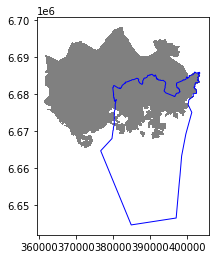

In [55]:
# Plot the layers
ax = grid.plot(facecolor='gray')
hel.plot(ax=ax, facecolor='None', edgecolor='blue')

In [56]:
# Check the crs of the municipality polygon
print(hel.crs)

epsg:3067


In [57]:
# Ensure that the CRS matches, if not raise an AssertionError
assert hel.crs == grid.crs, "CRS differs between layers!"

In [59]:
intersection = gpd.overlay(grid, hel, how='intersection')

ImportError: ignored

In [60]:
intersection.plot(color="b")

NameError: ignored